In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [3]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [4]:
from urllib.request import urlretrieve
urlretrieve(URL,'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x1257314c0>)

In [5]:
!head Fremont.csv

Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
11/01/2019 12:00:00 AM,12,7,5
11/01/2019 01:00:00 AM,7,0,7
11/01/2019 02:00:00 AM,1,0,1
11/01/2019 03:00:00 AM,6,6,0
11/01/2019 04:00:00 AM,6,5,1
11/01/2019 05:00:00 AM,20,9,11
11/01/2019 06:00:00 AM,97,43,54
11/01/2019 07:00:00 AM,299,120,179
11/01/2019 08:00:00 AM,583,261,322


In [6]:
data = pd.read_csv('Fremont.csv',index_col='Date',parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [7]:
data.describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,142144.000000,142144.000000,142144.000000
mean,111.101355,50.571280,60.530075
std,141.791650,65.360139,88.136627
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,145.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 142166 entries, 2019-11-01 00:00:00 to 2021-05-31 23:00:00
Data columns (total 3 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Fremont Bridge Total          142144 non-null  float64
 1   Fremont Bridge East Sidewalk  142144 non-null  float64
 2   Fremont Bridge West Sidewalk  142144 non-null  float64
dtypes: float64(3)
memory usage: 4.3 MB


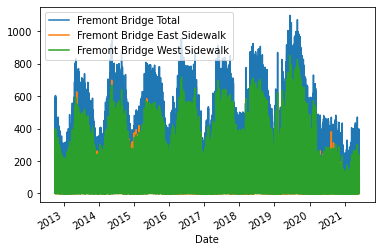

In [9]:
data.plot();

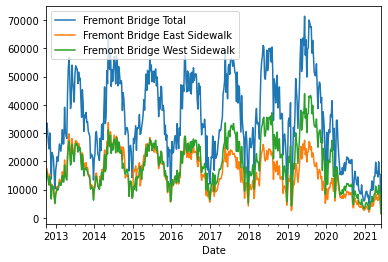

In [10]:
data.resample('w').sum().plot();

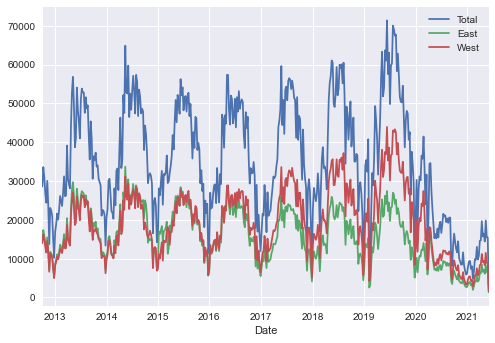

In [11]:
plt.style.use('seaborn')
data.columns = ['Total','East','West']
data.resample('w').sum().plot();

(0.0, 2526518.55)

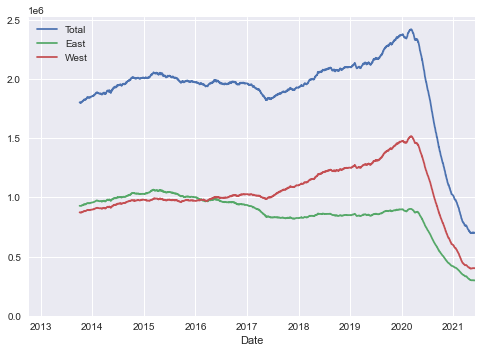

In [12]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None)

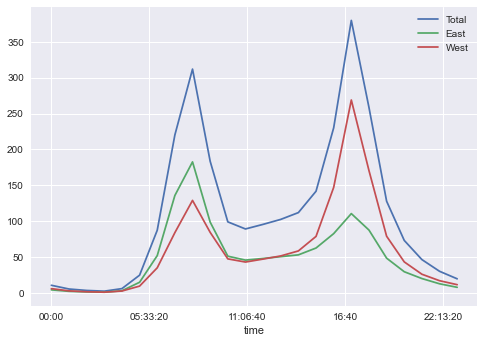

In [13]:
data.groupby(data.index.time).mean().plot();

In [14]:
pivoted = data.pivot_table('Total',index=data.index.time,columns=data.index.date)
pivoted.iloc[:10,:10]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-10,2012-10-11,2012-10-12
00:00:00,13.0,18.0,11.0,15.0,11.0,9.0,12.0,15.0,21.0,17.0
01:00:00,10.0,3.0,8.0,15.0,17.0,4.0,3.0,3.0,10.0,13.0
02:00:00,2.0,9.0,7.0,9.0,3.0,5.0,4.0,3.0,13.0,5.0
03:00:00,5.0,3.0,4.0,3.0,6.0,5.0,8.0,4.0,2.0,7.0
04:00:00,7.0,8.0,9.0,5.0,3.0,5.0,9.0,5.0,12.0,5.0
05:00:00,31.0,26.0,25.0,5.0,9.0,23.0,31.0,25.0,12.0,14.0
06:00:00,155.0,142.0,105.0,27.0,17.0,137.0,153.0,149.0,43.0,87.0
07:00:00,352.0,319.0,319.0,33.0,26.0,327.0,368.0,340.0,304.0,183.0
08:00:00,437.0,418.0,370.0,105.0,69.0,457.0,462.0,435.0,404.0,268.0
09:00:00,276.0,241.0,212.0,114.0,103.0,278.0,275.0,255.0,189.0,145.0


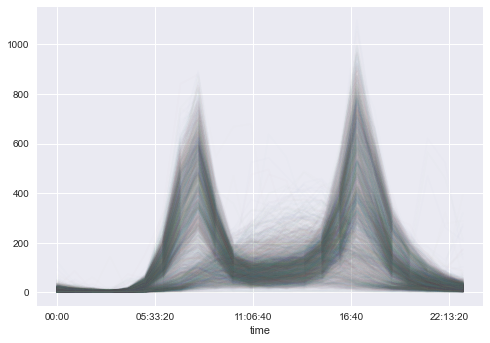

In [15]:
pivoted.plot(legend=False,alpha=0.01);